In [1]:
import xarray as xr
import numpy as np

In [71]:
ds = xr.DataArray(np.random.normal(size=(1_000, 2_000)), dims=("x", "y"), name="data").to_dataset()
for n in range(100):
    ds["data"] = ds["data"].rolling(x=29, min_periods=1, center=True).mean()
    ds["data"] = ds["data"].rolling(y=29, min_periods=1, center=True).mean()
# ds["data"] = ds["data"].where(ds["data"] > 0)
ds

<xarray.Dataset>
Dimensions:  (x: 1000, y: 2000)
Dimensions without coordinates: x, y
Data variables:
    data     (x, y) float64 0.01016 0.01015 0.01014 ... 0.001425 0.001431

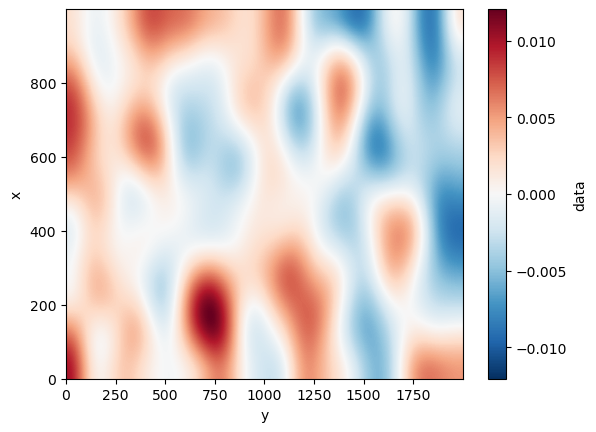

In [72]:
ds.data.plot()

In [73]:
ds.nbytes / 1e6

16.0

In [74]:
ds.to_netcdf("test.nc")

In [75]:
!ls -lah test.nc

-rw-r--r-- 1 jovyan jovyan 16M Mar  7 11:14 test.nc


In [76]:
!gzip -vf test.nc 
!ls -lah test.nc.gz

test.nc:	  4.7% -- replaced with test.nc.gz
-rw-r--r-- 1 jovyan jovyan 15M Mar  7 11:14 test.nc.gz


In [77]:
ds.chunk({"x": 500, "y": 500}).to_zarr("test.zarr/", mode="w")

In [78]:
!du -sh test.zarr/

13M	test.zarr/


In [79]:
!ls -lah test.zarr/data

total 13M
drwxr-xr-x 12 jovyan jovyan  384 Mar  7 11:14 .
drwxr-xr-x  6 jovyan jovyan  192 Mar  7 11:14 ..
-rw-r--r--  1 jovyan jovyan  345 Mar  7 11:14 .zarray
-rw-r--r--  1 jovyan jovyan   61 Mar  7 11:14 .zattrs
-rw-r--r--  1 jovyan jovyan 1.6M Mar  7 11:14 0.0
-rw-r--r--  1 jovyan jovyan 1.6M Mar  7 11:14 0.1
-rw-r--r--  1 jovyan jovyan 1.6M Mar  7 11:14 0.2
-rw-r--r--  1 jovyan jovyan 1.6M Mar  7 11:14 0.3
-rw-r--r--  1 jovyan jovyan 1.6M Mar  7 11:14 1.0
-rw-r--r--  1 jovyan jovyan 1.6M Mar  7 11:14 1.1
-rw-r--r--  1 jovyan jovyan 1.6M Mar  7 11:14 1.2
-rw-r--r--  1 jovyan jovyan 1.5M Mar  7 11:14 1.3


In [80]:
!cat test.zarr/data/.zarray

{
    "chunks": [
        500,
        500
    ],
    "compressor": {
        "blocksize": 0,
        "clevel": 5,
        "cname": "lz4",
        "id": "blosc",
        "shuffle": 1
    },
    "dtype": "<f8",
    "fill_value": "NaN",
    "filters": null,
    "order": "C",
    "shape": [
        1000,
        2000
    ],
    "zarr_format": 2
}